## 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from io import StringIO
from sklearn import tree
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')

## 2. Importing data

In [2]:
df= pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

## 3. Understanding data

In [3]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:400
No. of features:11


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df.describe(include='all')

Sales   CompPrice      Income  Advertising  Population  \
count   400.000000  400.000000  400.000000   400.000000  400.000000   
unique         NaN         NaN         NaN          NaN         NaN   
top            NaN         NaN         NaN          NaN         NaN   
freq           NaN         NaN         NaN          NaN         NaN   
mean      7.496325  124.975000   68.657500     6.635000  264.840000   
std       2.824115   15.334512   27.986037     6.650364  147.376436   
min       0.000000   77.000000   21.000000     0.000000   10.000000   
25%       5.390000  115.000000   42.750000     0.000000  139.000000   
50%       7.490000  125.000000   69.000000     5.000000  272.000000   
75%       9.320000  135.000000   91.000000    12.000000  398.500000   
max      16.270000  175.000000  120.000000    29.000000  509.000000   

             Price ShelveLoc         Age   Education Urban   US  
count   400.000000       400  400.000000  400.000000   400  400  
unique         NaN         3         NaN         NaN     2    2  
top            NaN    Medium         NaN         NaN   Yes  Yes  
freq           NaN       219         NaN         NaN   282  258  
mean    115.795000       NaN   53.322500   13.900000   NaN  NaN  
std      23.676664       NaN   16.200297    2.620528   NaN  NaN  
min      24.000000       NaN   25.000000   10.000000   NaN  NaN  
25%     100.000000       NaN   39.750000   12.000000   NaN  NaN  
50%     117.000000       NaN   54.500000   14.000000   NaN  NaN  
75%     131.000000       NaN   66.000000   16.000000   NaN  NaN  
max     191.000000       NaN   80.000000   18.000000   NaN  NaN

###  Outlier check

<Axes: >

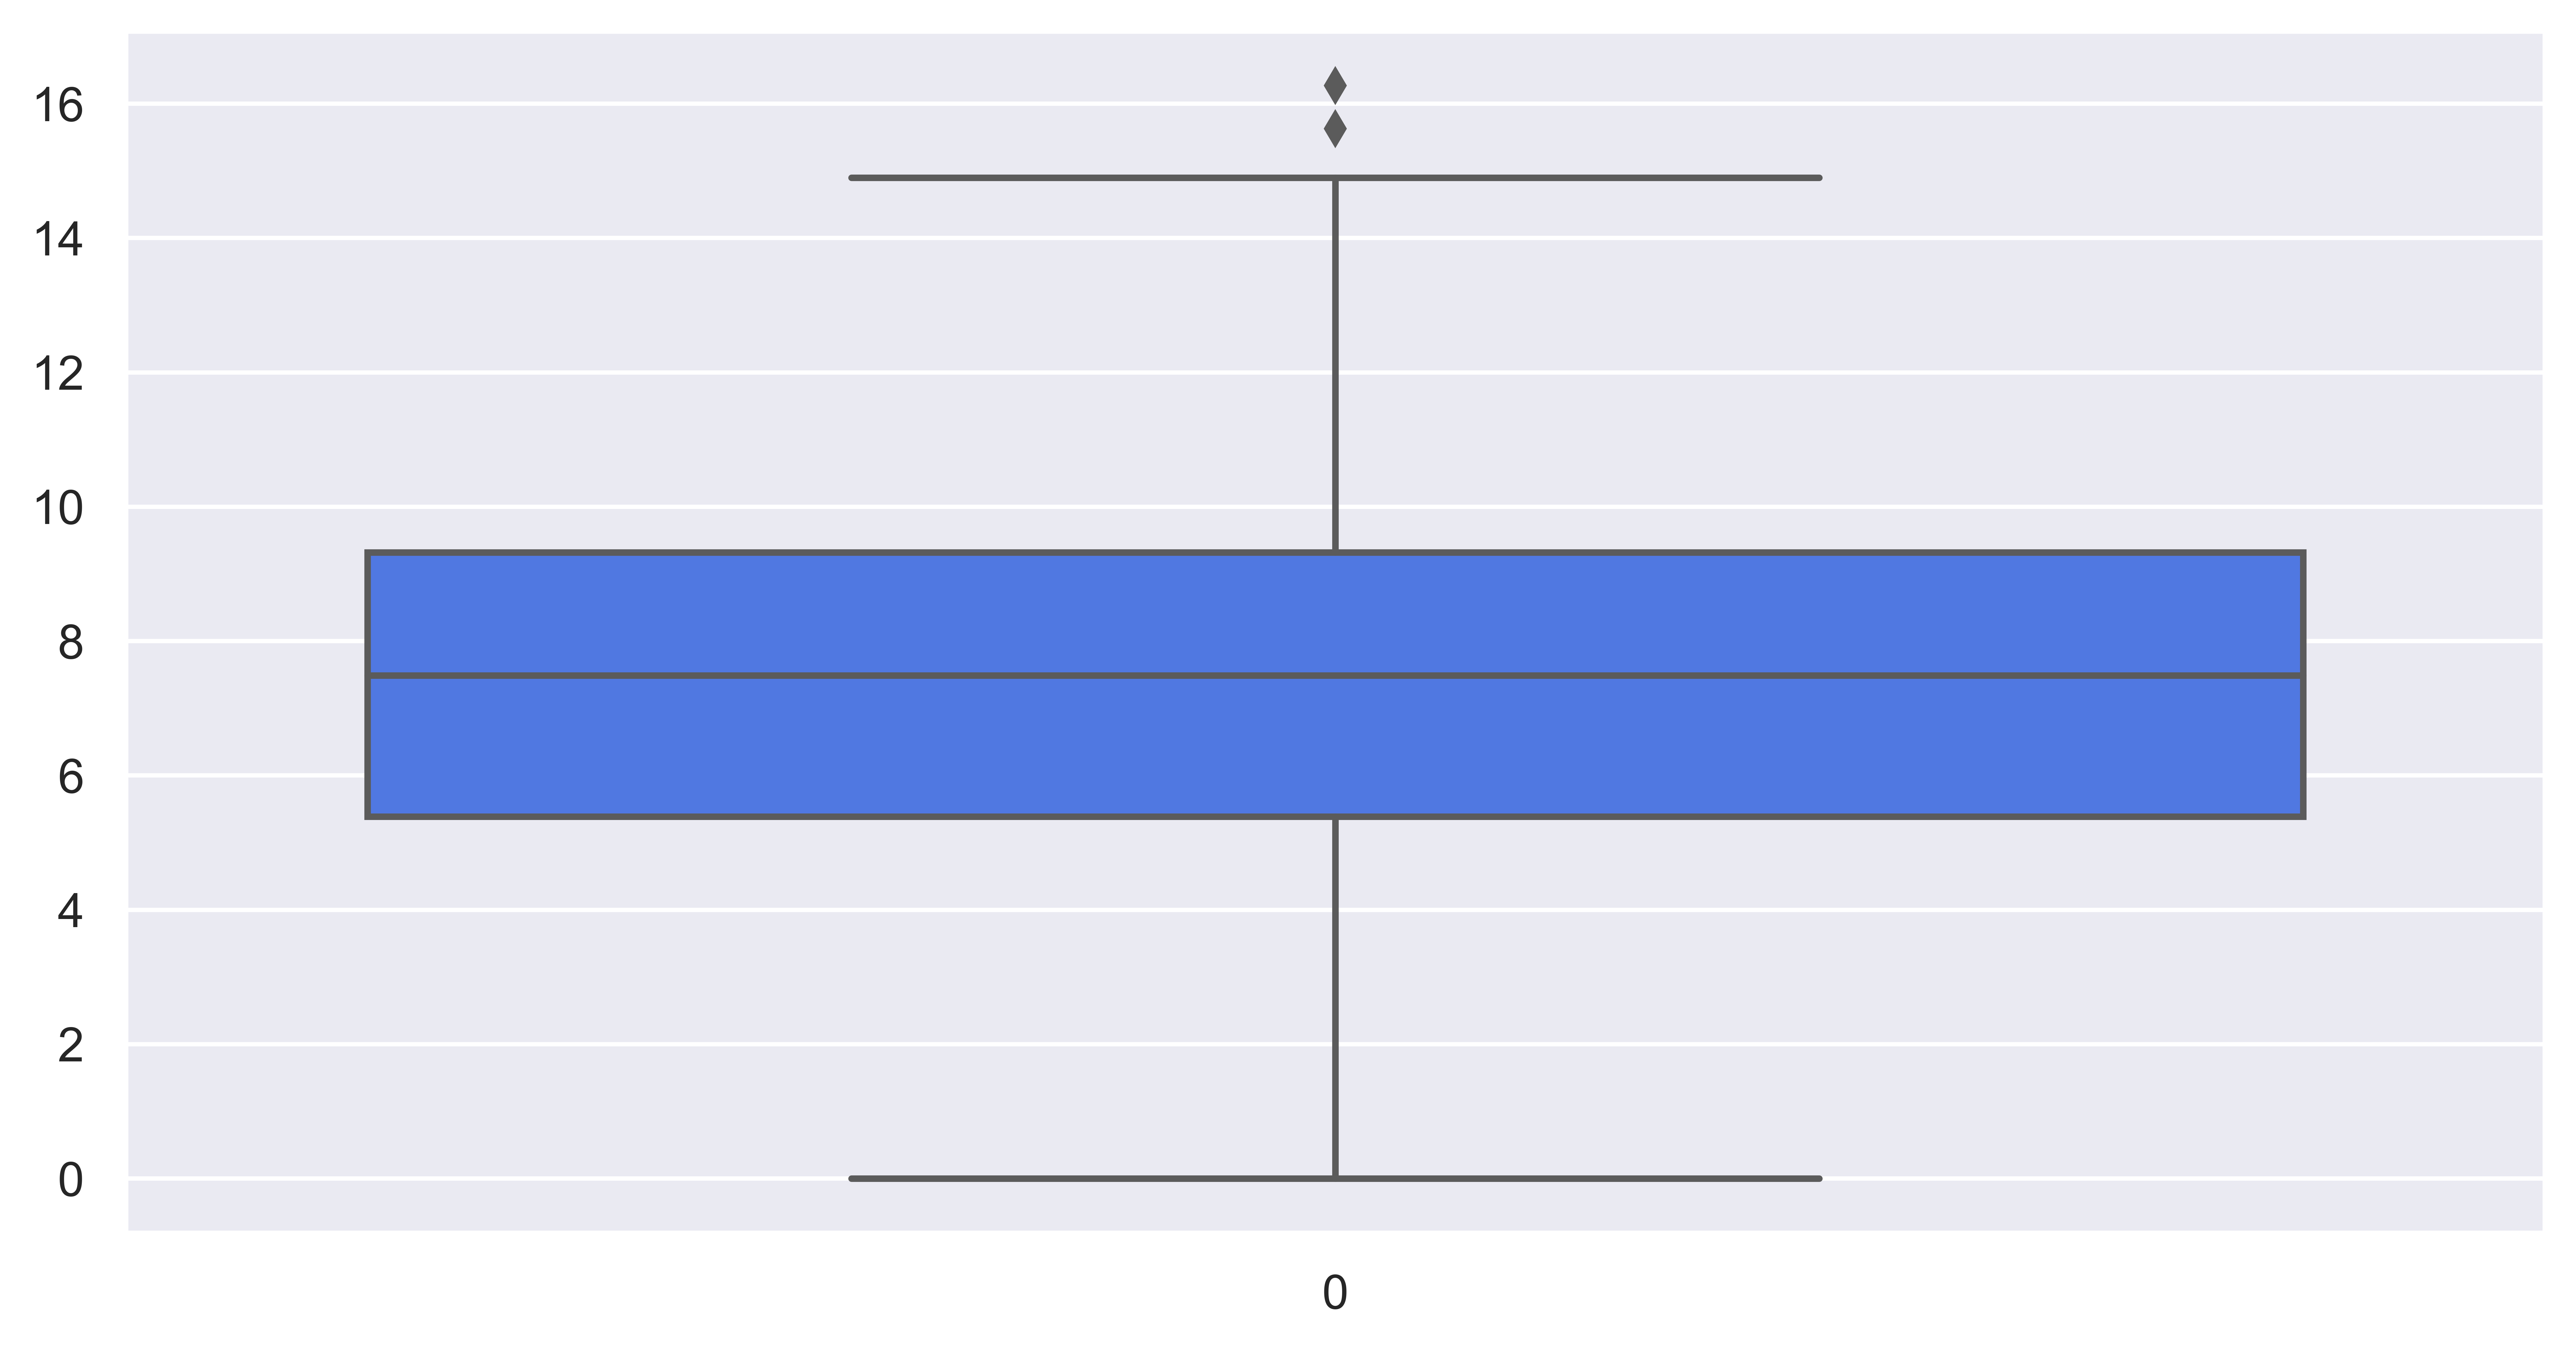

In [7]:
sns.boxplot(df['Sales'])

#### There are outliers present in the data

In [8]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


In [9]:
df1= df.copy()
df1= pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [10]:
corr= df1.corr()

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<Axes: >

##  Model Building
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [12]:
df1["sales"]= "small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis= 1,inplace= True)

In [13]:
df1

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  sales  
0        0       1  large  
1        0       1  large  
2        0       1  large  
3        0       1  small  
4        1       0  small  
..     ...     ...    ...  
395      0       1  large  
396      0       1  small  
397      0       1  small  
398      0       1  small  
399      0       1  large  

[400 rows x 15 columns]

In [14]:
x= df1.iloc[:,:-1]
y= df1['sales']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [16]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [17]:
model= RandomForestClassifier() 
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [18]:
ypred

array(['small', 'large', 'small', 'large', 'large', 'large', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'large', 'large', 'small', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'large', 'large', 'small', 'large',
       'large', 'small', 'small', 'small', 'large', 'small', 'large',
       'large', 'small', 'large', 'large', 'large', 'large', 'large',
       'large', 'small', 'large', 'large', 'small', 'large', 'large',
       'large', 'small', 'small', 'small', 'small', 'large', 'small',
       'large', 'small', 'large', 'small', 'large', 'large', 'small',
       'small', 'large', 'small'], dtype=object)

In [19]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       large       0.77      0.75      0.76        40
       small       0.76      0.78      0.77        40

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [20]:
print('Training Accuracy : ',model.score(x_train,y_train))
print('Testing Accuracy : ',model.score(x_test,y_test))

Training Accuracy :  1.0
Testing Accuracy :  0.7625


In [21]:
len(model.estimators_)

100

In [22]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [23]:
df1['sales'].unique()

array(['large', 'small'], dtype=object)

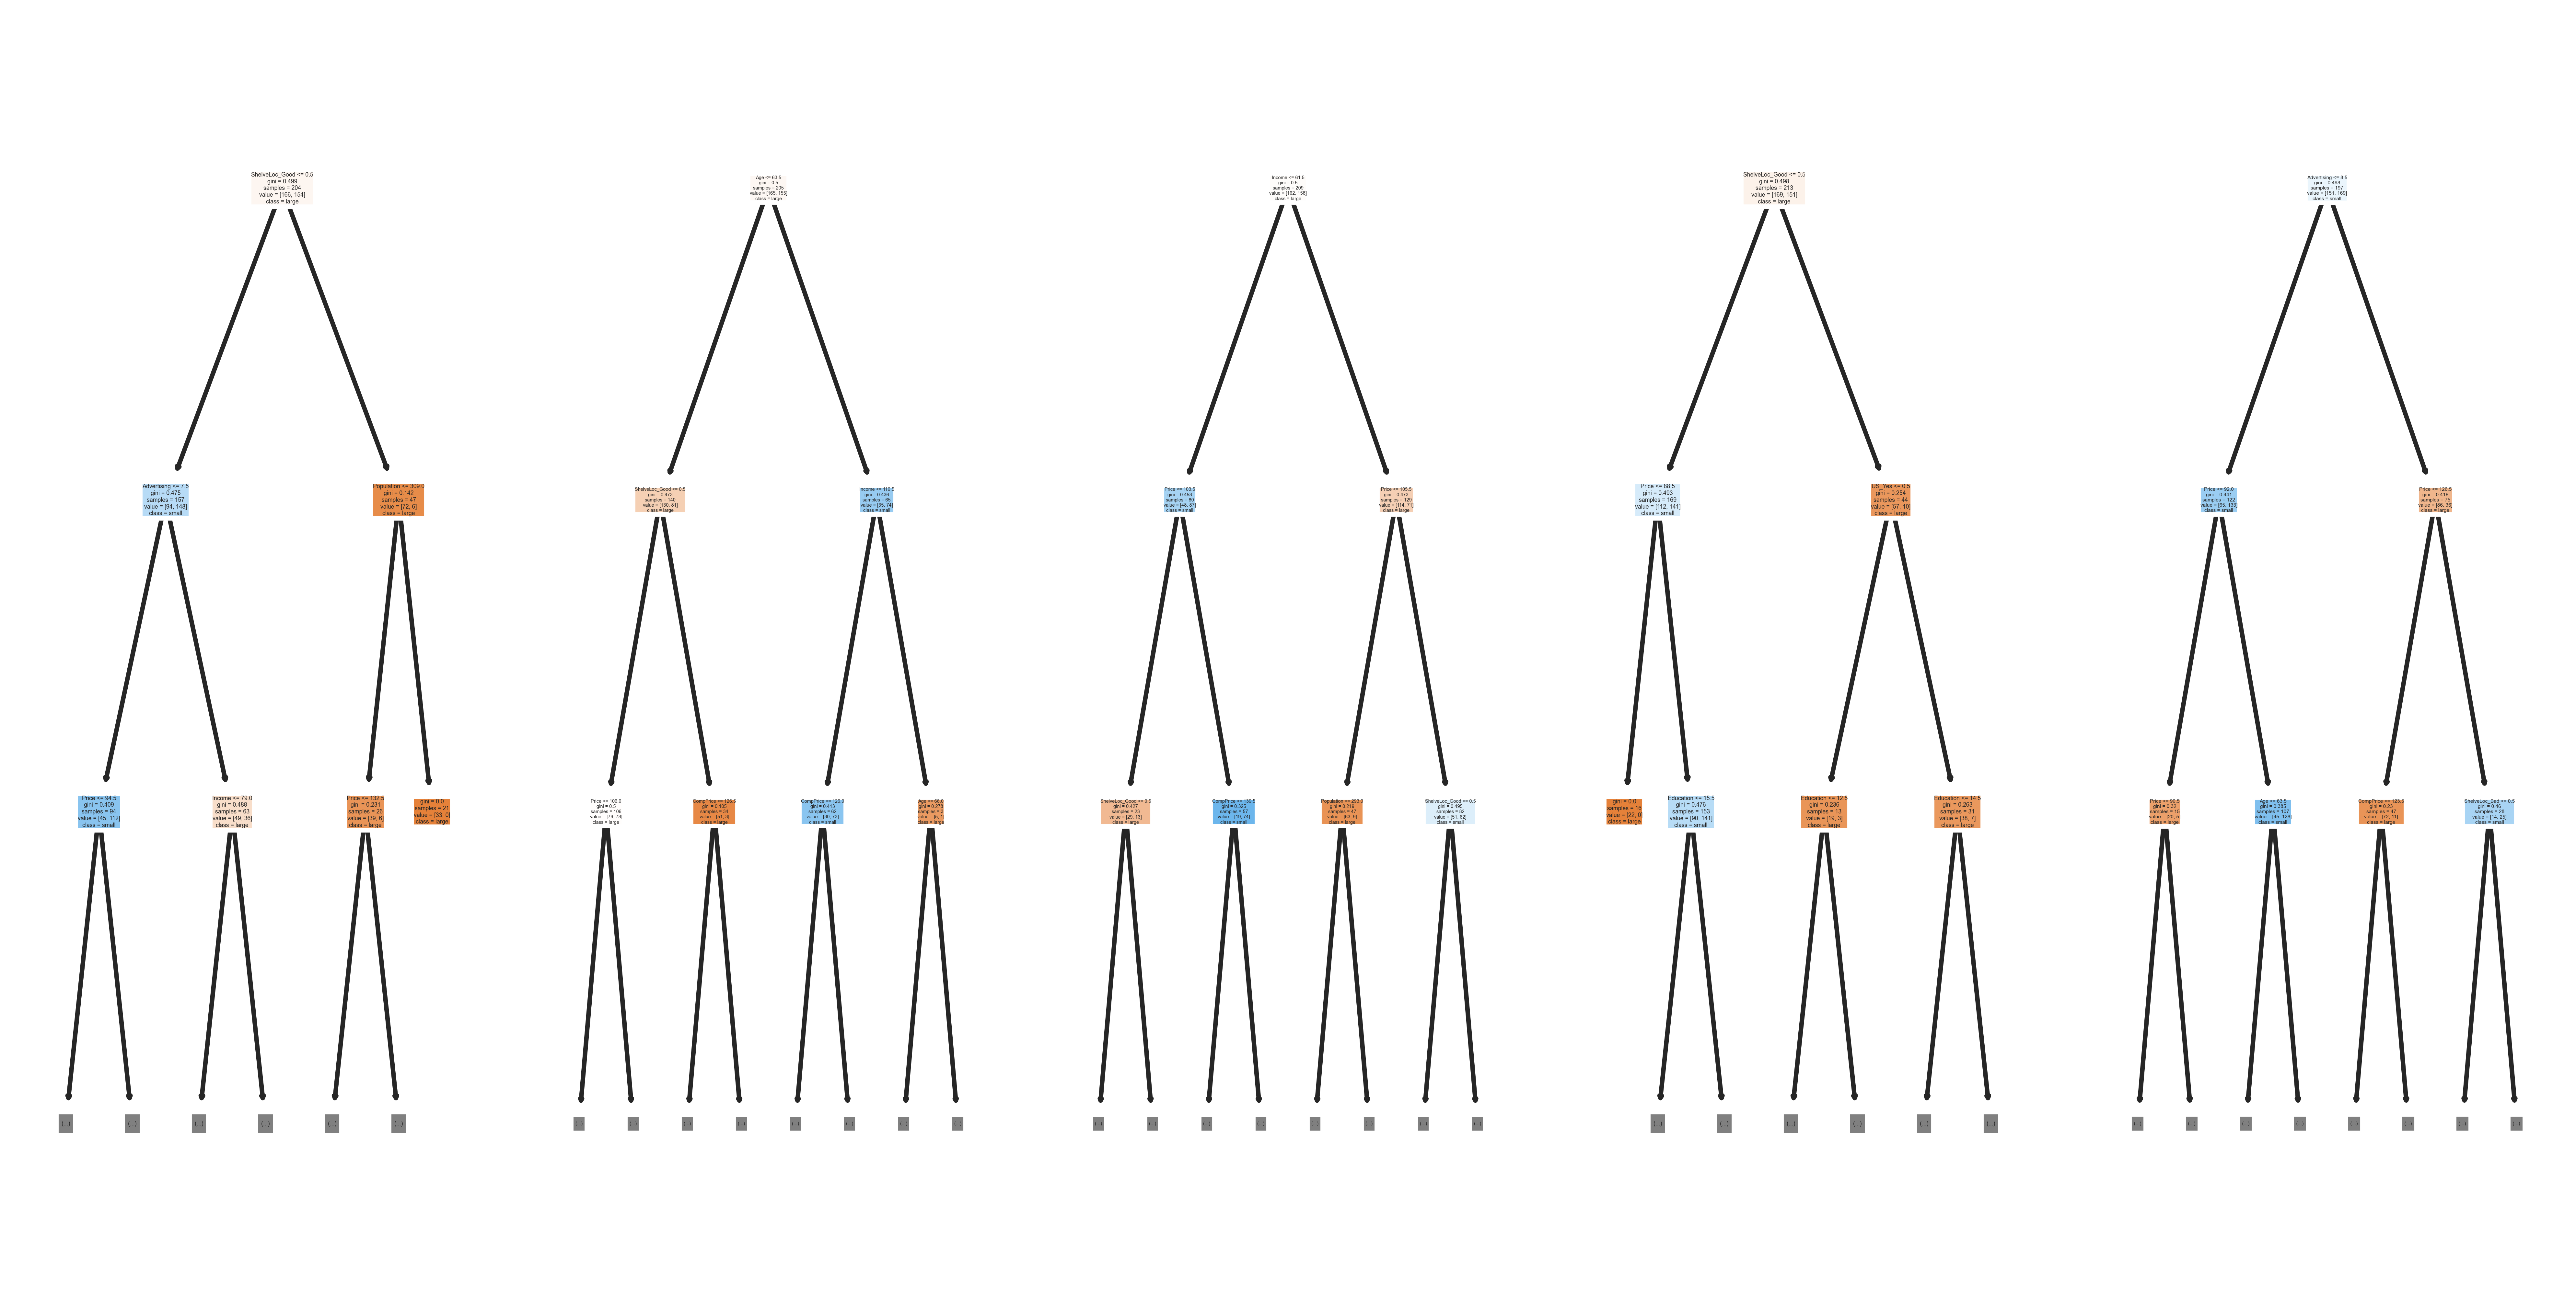

In [24]:
fig,ax = plt.subplots(1,5)

for i in range(0,5):
    tree.plot_tree(model.estimators_[i],
                  feature_names=list(x.columns),
                  class_names=list(df1['sales'].unique()),
                  filled=True,
                   max_depth=2,
                  ax  = ax[i])

## Conclusion
     We got the Testing Accuracy as 76%